## This Notebook is to familiarize the Bank of Canada dataset

Dataset source: https://www.bankofcanada.ca/markets/market-operations-liquidity-provision/covid-19-actions-support-economy-financial-system

Api to be used: Valet_api

The Bank of Canada Valet Web Services offers programmatic access to global financial data. By using the Valet API, you can retrieve financial data and information from the Bank of Canada — such as daily exchange rates of the Canadian dollar against the European euro.

In [94]:
import pandas as pd
import numpy as np
import matplotlib
import datetime
import quandl
from pathlib import Path

In [95]:
# Install valet_api from bank of Canada
#https://pypi.org/project/pyvalet/

In [96]:
pip install pyvalet

Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [98]:
from pyvalet import ValetInterpreter

vi = ValetInterpreter()

## Bankers’ Acceptance Purchase Facility (BAPF)
To support the continuous functioning of financial markets, the Bank of Canada purchases Bankers’ Acceptances (BAs) in the secondary market through the Bankers’ Acceptance Purchase Facility (BAPF). The BA market is one of Canada’s core funding markets and a key source of financing for small- and medium-size corporate borrowers.

The BAPF program just started since March 23rd.

In [99]:
# Data retrieval for BAPF
BAPF_group = vi.get_group_observations("BANKERS_ACCEPTANCE_PURCHASE_FACILITY", response_format='csv')


In [100]:
BAPF_group["Date"] = BAPF_group["\ndate\""]
del BAPF_group["\ndate\""]

In [101]:
#Check data
BAPF_group = BAPF_group.set_index("Date")
BAPF_group.head()

,BAPF_SETTLEMENT_DATE,BAPF_MATURITY_DATE_START,BAPF_MATURITY_DATE_END,BAPF_AMOUNT_PURCHASED,BAPF_AMOUNT_TO_BE_PURCHASED,BAPF_RESERVE_RATE,BAPF_WEIGHTED_AVG_YIELD
Date,,,,,,,
2020-03-23,2020-03-25,2020-03-26,2020-05-04,15000.0,15000.0,0.63,1.57
2020-03-30,2020-04-01,2020-04-02,2020-07-21,20000.0,20000.0,0.43,1.15
2020-04-06,2020-04-08,2020-04-09,2020-07-28,5570.0,20000.0,0.40,0.52
2020-04-13,2020-04-15,2020-04-16,2020-08-04,2660.0,10000.0,0.37,0.39
2020-04-20,2020-04-22,2020-04-23,2020-08-11,190.0,10000.0,0.40,0.40


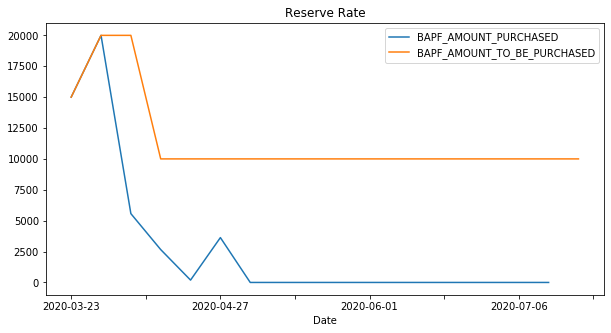

In [102]:
BAPF_group[["BAPF_AMOUNT_PURCHASED","BAPF_AMOUNT_TO_BE_PURCHASED"]].plot(figsize = (10,5), title = "Reserve Rate")

## Corporate Bond Purchase Program
The Corporate Bond Purchase Program (CBPP) supports the liquidity and proper functioning of the corporate debt market, by purchasing bonds through a tender process in the secondary market. A liquid and efficient market for Canadian-dollar corporate bonds allows companies, currently challenged by the impact of the COVID-19 pandemic, to continue to obtain necessary longer-dated financing to support their operations, ultimately aiding the Canadian economy. It also strengthens the pass-through of monetary policy actions to borrowers.

Corporate bond purchases will be conducted by TD Asset Management (TDAM) on behalf of the Bank of Canada.


The program will begin on May 26, 2020 and operate for 12 months from May 26, 2020 to May 25, 2021.

In [119]:
csvpath = Path('../UofT-Project-1-Group-5/valet_data/CBPP.csv')
CBPP = pd.read_csv(csvpath)
CBPP

,AUCTION_DATE,SETTLE_DATE,NUM_PURCHASED,NUM_SEC_ELGB,PAR_AMT_PURCHASED,MAX_PAR_AMT_PURCHASED
0,2020-07-23,2020-07-27,0,70,0.000,100
1,2020-07-21,2020-07-23,0,71,0.000,100
2,2020-07-16,2020-07-20,0,71,0.000,100
3,2020-07-14,2020-07-16,0,72,0.000,100
4,2020-07-09,2020-07-13,0,84,0.000,100
5,2020-07-07,2020-07-09,0,80,0.000,100
6,2020-07-02,2020-07-06,0,60,0.000,100
7,2020-06-29,2020-07-02,1,64,1.500,100
8,2020-06-25,2020-06-29,8,53,25.429,100
9,2020-06-23,2020-06-25,2,56,6.525,100


In [120]:
CBPP = CBPP.set_index("AUCTION_DATE")

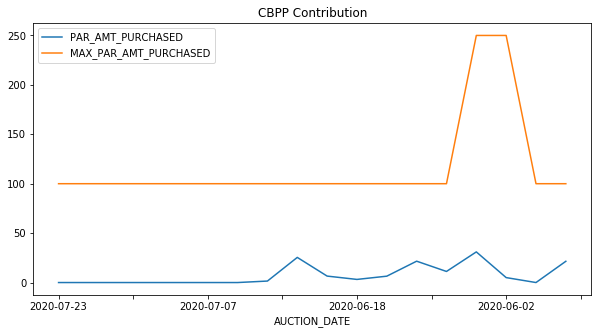

In [121]:
CBPP[["PAR_AMT_PURCHASED","MAX_PAR_AMT_PURCHASED"]].plot(figsize = (10,5), title = "CBPP Contribution")